# Imported libraries

In [24]:
#SSS
import pandas as pd
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statistics
import numpy as np
import statistics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVR

#Spajanje vise skupova podataka
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")



## Printing data example

In [25]:
#prikaz podataka
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Showing data types

In [26]:
#Tipovi podataka
data.dtypes
#ocigledno ce biti potrebna konverzija nekih podataka

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

## Showing data info

In [27]:
#informacije o podacima
data.info()
#imamo informaciju o tome da nema null podataka

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Checking for missing values

In [28]:
#provera da li ima missing values
data.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

### Dropping duplicates

In [29]:
#brisanje duplikata
data.duplicated(subset=None, keep='first')
#data.drop_duplicates(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
48199    False
48200    False
48201    False
48202    False
48203    False
Length: 48204, dtype: bool

### Scaling 'clouds_all' data

In [30]:
# scaler = MinMaxScaler()

#     #Scaling cloud data
# data[['clouds_all']] = scaler.fit_transform(data[['clouds_all']])
#     #Scaling of temperature data
# data[['temp']]=scaler.fit_transform(data[['temp']])

# Descriptive analytics

In [31]:
    #1 Mean of rain in millimeters per one hour 

averageRain = data['rain_1h'].mean()
print("Average rain per 1h: " + str(averageRain)) 

    #2 Mean of traffic volume 
averageTrafficVolume = data['traffic_volume'].mean()
print("Average traffic volume: " + str(averageTrafficVolume)) 

    #Harmonic mean
hmean = statistics.harmonic_mean(data['traffic_volume'])
print("Harmonic mean traffic volume: " + str(hmean)) 

    #3 Median of falling snow in 1h
medianSnow = data['snow_1h'].median()
print("Median snow on 1h: ", medianSnow)

    #4 Median of traffic volume
medianTrafficVolume = data['traffic_volume'].median()
print("Median traffic volume: " + str(medianTrafficVolume)) 

    #5 Standard deviation of traffic volume
standard_deviation = data['traffic_volume'].std()
print("Standard deviation of traffic volume: ", standard_deviation)

    #6 Standard deviation of temperature
standard_deviation = data['temp'].std()
print("Standard deviation of temp: ", standard_deviation)

#data.head(3000)
#data[['clouds_all']]

    #Converting temperature from Kelvin to Celsius
#data['Temperature'] = data['temp'].subtract(273.16)


    #Output sMinimum and Maximum Temperature
minTemp = data['temp'].min()
maxTemp = data['temp'].max()
print("Minimum temperature: ", minTemp, "Maximum temperature: ", maxTemp)

    #range of data - difference between inimum and maximum
rangee=np.ptp(data['traffic_volume'])
print("range guzve je:", rangee)

rangee=np.ptp(data['temp'])
print("range temperature je:", rangee)



    #Mode
mode = data['traffic_volume'].mode()
print("Mode of traffic volume: ", mode)

variance = statistics.variance(data['traffic_volume'])
print("Variance of traffic volume: ", variance)

Average rain per 1h: 0.33426396149697535
Average traffic volume: 3259.8183553232097
Harmonic mean traffic volume: 0
Median snow on 1h:  0.0
Median traffic volume: 3380.0
Standard deviation of traffic volume:  1986.8606704463552
Standard deviation of temp:  13.338231912676283
Minimum temperature:  0.0 Maximum temperature:  310.07
range guzve je: 7280
range temperature je: 310.07
Mode of traffic volume:  0    353
1    356
Name: traffic_volume, dtype: int64
Variance of traffic volume:  3947615.3237665542


### Describing target data

In [32]:
#opis podataka
#scipy describe
result = stats.describe(data['traffic_volume'], ddof=1, bias=False)
print(str(result))
#pandas describe
data.describe()

DescribeResult(nobs=48204, minmax=(0, 7280), mean=3259.8183553232097, variance=3947615.3237665547, skewness=-0.08938135143647916, kurtosis=-1.3090882117269556)


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


### Describing object data

In [33]:
#opis objekata

#pandas describe objects
data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


### Checking 'date_time' data

In [34]:
# pocetak i kraj zapisa podataka
print("Start :" +data['date_time'].max())
print("End :" +data['date_time'].min())

Start :2018-09-30 23:00:00
End :2012-10-02 09:00:00


### Checking 'weather_main' data by temperature

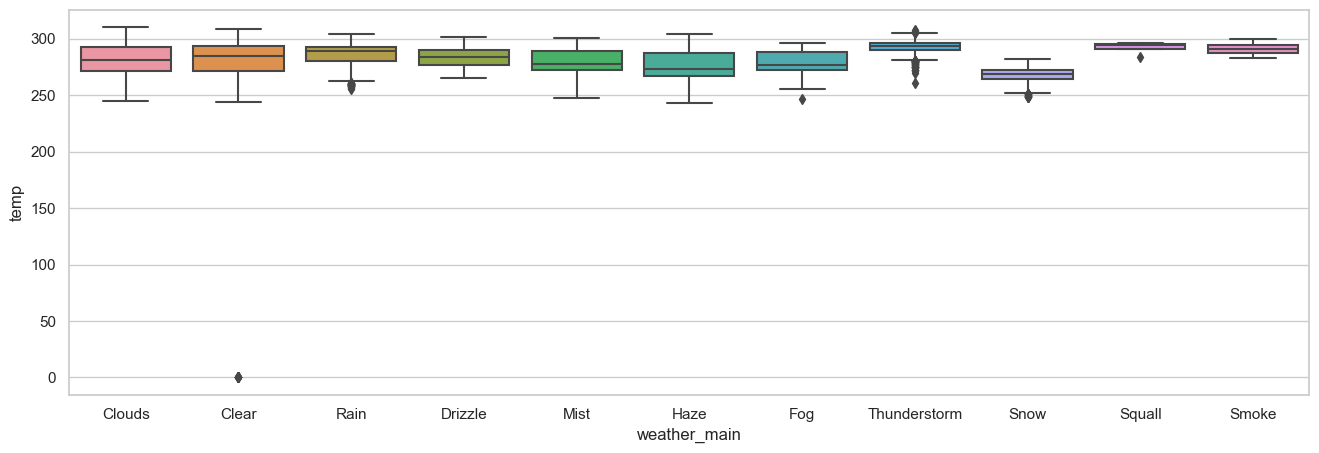

In [35]:
%matplotlib inline
sns.set(style="whitegrid")
plt.figure(figsize=(16,5))
ax = sns.boxplot( x="weather_main", y="temp", data=data, orient="v")

### Pie plotting 'weather_description' data

<AxesSubplot:ylabel='weather_description'>

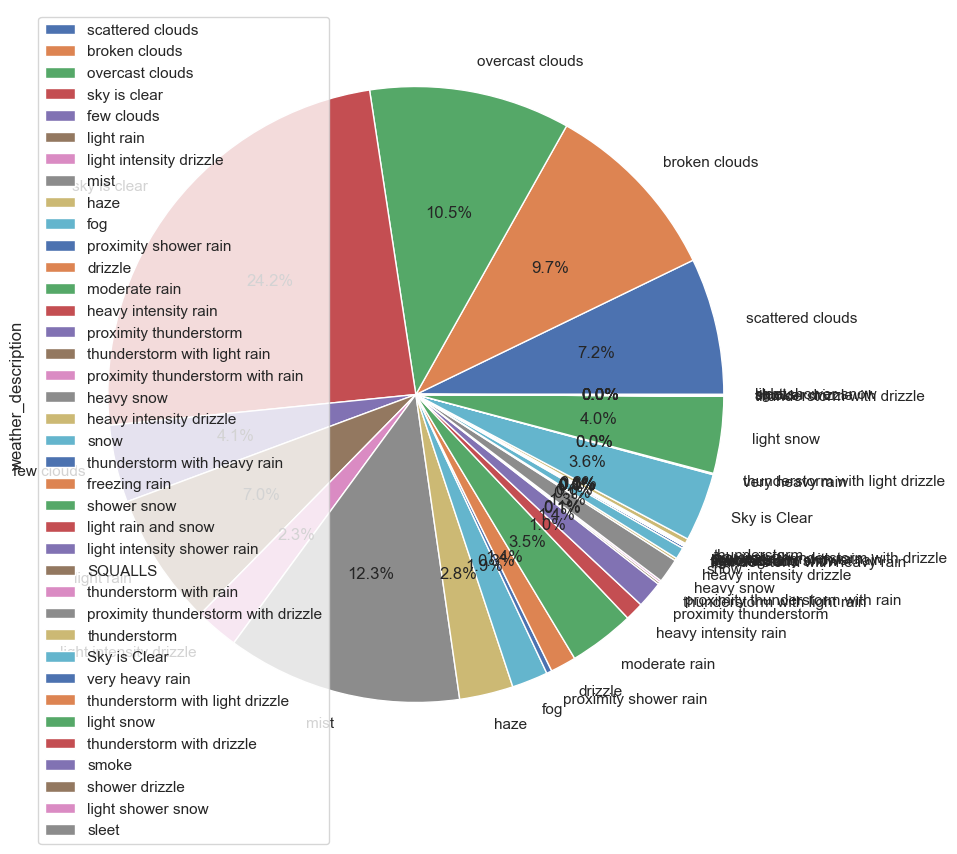

In [36]:
type_counts = data['weather_description'].value_counts()
df2 = pd.DataFrame({'weather_description': type_counts}, 
                     index = ['scattered clouds', 'broken clouds', 'overcast clouds', 'sky is clear',
    'few clouds', 'light rain', 'light intensity drizzle', 'mist', 'haze', 'fog',
    'proximity shower rain', 'drizzle', 'moderate rain', 'heavy intensity rain',
    'proximity thunderstorm', 'thunderstorm with light rain',
    'proximity thunderstorm with rain', 'heavy snow', 'heavy intensity drizzle',
    'snow', 'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
    'light rain and snow', 'light intensity shower rain', 'SQUALLS',
    'thunderstorm with rain', 'proximity thunderstorm with drizzle',
    'thunderstorm', 'Sky is Clear', 'very heavy rain',
    'thunderstorm with light drizzle', 'light snow',
    'thunderstorm with drizzle', 'smoke', 'shower drizzle', 'light shower snow',
    'sleet'])
df2.plot.pie(y='weather_description', figsize=(10,10), autopct='%1.1f%%')

### Countplotting holiday data

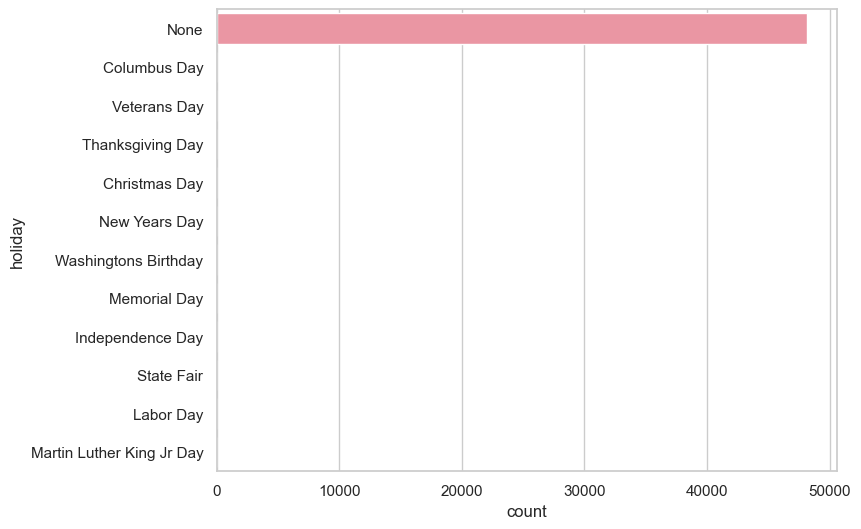

In [37]:
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = data)
plt.show()

### Countplotting holiday data excluding 'None'

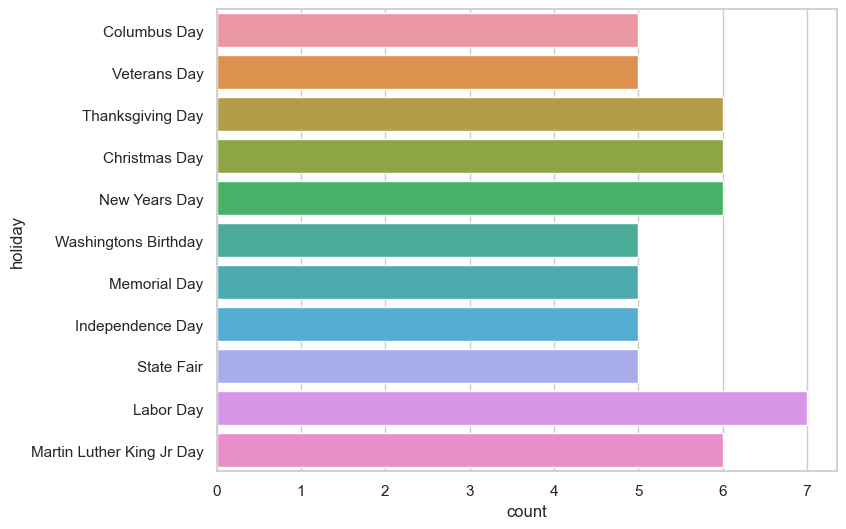

In [38]:
#'None' predstavlja problem, ali i resenje, jer ga ima mnogo vise od ostalih dana
holidays = data.loc[data['holiday'] != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()
#ovaj prikaz je znatno bolji i daje prikaz o praznicima, obzirom na to da su praznici svake godine na isti dan, jasno je da je broj slican

### Boxplotting temperature data

c:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


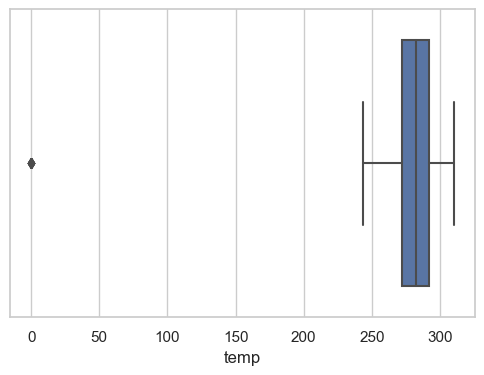

In [39]:
#prikaz podataka o temperaturi
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = data)
plt.show()
#iz prikaza je jasno da postoji oversempling koji oze da utice na mean vrednost

### Temperature switch from Kelvin to Celsius 

In [40]:
# prebacivanje temperature iz kelvina u celzius zato sto je celzius laksi za razumevanje, bar nama
#data['temp'] = (data['temp']-273.15)
#plt.figure(figsize=(6,4))
#sns.boxplot('temp', data = data)
#plt.show()

### Checking rain per 1h data

<Figure size 600x400 with 0 Axes>

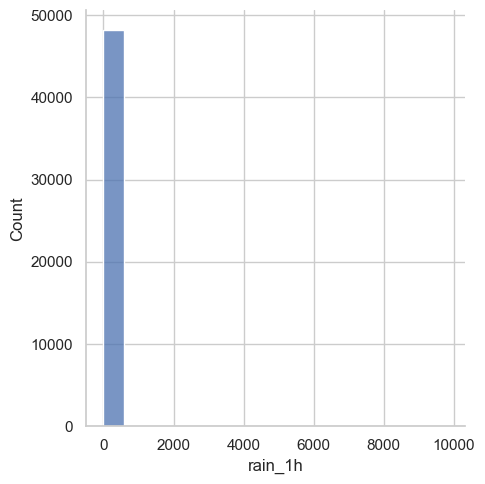

In [41]:
#prikaz podataka o kisi
plt.figure(figsize=(6,4))
sns.displot(data.rain_1h)
plt.show()
# iz prikazanog se vidi da su podaci sto se tice kise delom nekonzistentni, a i u atribut weather_main govori kada je kisa


### Checking rain per 1h less than 1

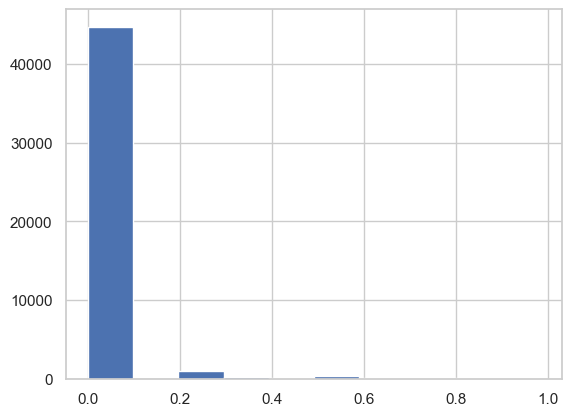

In [42]:
#histogram koji govori o padavimana i koliko u proseku padavina ima oko koje vrednosti
plt.hist(data.rain_1h.loc[data.rain_1h<1])
plt.show()
#jasan prikaz da uglavnom nema kise

### Checking snow per 1h

<Figure size 600x400 with 0 Axes>

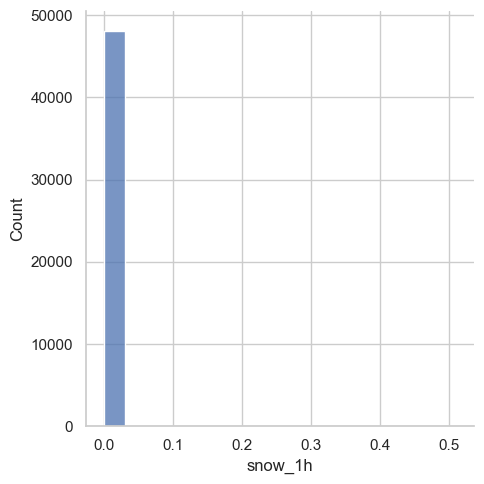

In [43]:
plt.figure(figsize=(6,4))
sns.displot(data.snow_1h)
plt.show()

### Checking rain per 1h data

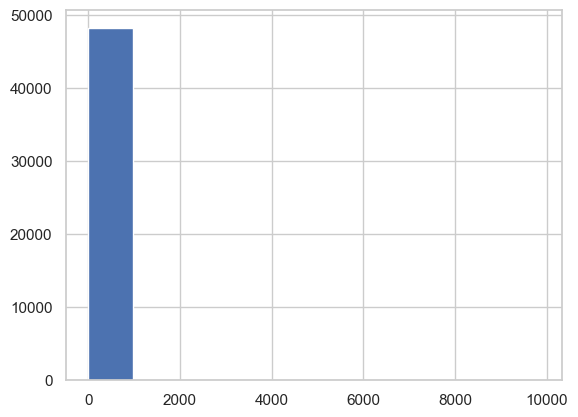

In [44]:
plt.hist(data.rain_1h.loc[data.snow_1h<1])
plt.show()

### Describing 'clouds_all' data

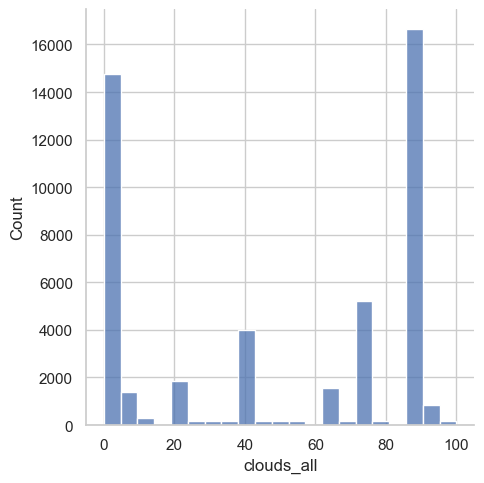

count    48204.000000
mean        49.362231
std         39.015750
min          0.000000
25%          1.000000
50%         64.000000
75%         90.000000
max        100.000000
Name: clouds_all, dtype: float64

In [45]:
#oblacnost 
sns.displot(data.clouds_all)
plt.show()
data['clouds_all'].describe()

### Countplotting 'weather_main' data

<AxesSubplot:xlabel='count', ylabel='weather_main'>

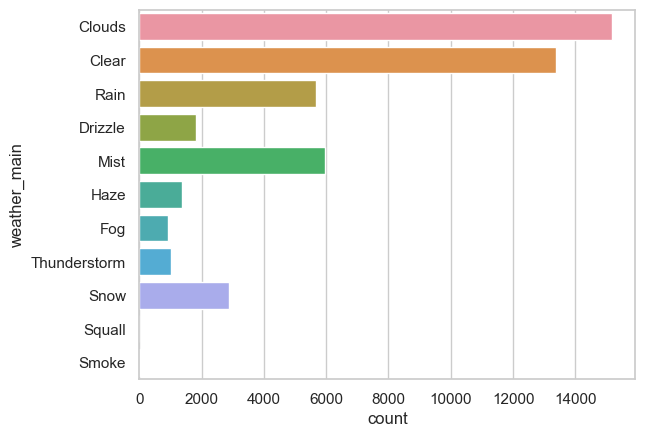

In [46]:
#prikaz podataka o tipovima vremena
sns.countplot(y='weather_main', data=data)

### Piechart of 'weather_main' data

In [47]:

type_counts = data['weather_main'].value_counts()
df2 = pd.DataFrame({'Weather Type': type_counts}, 
                     index = ['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']
                   )
df2.plot.pie(y='Weather Type', figsize=(10,10), autopct='%1.1f%%')

<AxesSubplot:ylabel='Weather Type'>

Error in callback <function flush_figures at 0x000001B538930280> (for post_execute):


KeyboardInterrupt: 

### Counting 'traffic_volume' data

In [ ]:
#histogram koji prikazuje vrednosti guzve izmedju vrednosti od minimalne do maksimalne
filter_data = data.dropna(subset=['traffic_volume'])
plt.figure(figsize=(20,10))
sns.histplot(filter_data['traffic_volume'], kde=False)
#sa histograma se vidi da je najvise vrednosti guzve izmedju 200 i 400

### Checking 'weather_description' data

In [ ]:
#opisi tipova vremena
plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=data)
plt.show()
#jasno je da je opis tipova vremena feature koji je suvisan, jer vec postoji vremenska prilika

### Checking traffic volume for holidays

In [ ]:
#poredjenje gustine saobracaja za praznike
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

### Traffic volume dependency by temperature

In [ ]:
#zavisnost guzve od temperature
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = data.loc[data.temp>-50])
plt.show()

### Checking traffic volume dependency by clouds coverage of the sky 

In [ ]:
#prikaz zavisnosti guzve od oblacnosti 
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = data)
plt.show()

### Traffic volume dependency by weather type

In [ ]:
#prikaz zavisnosti guzve od tipa vremena
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = data)
plt.show()

### Corelation using heatmap

In [ ]:
#trazenje jake korelacije izmedju guzve i nekog od feature-a, uz pomoc toplotne mape
sns.heatmap(data.corr(), annot=True)
plt.show()

### Checking correlation coefficient example

In [ ]:
corr_matrix = np.corrcoef(data['rain_1h'], data['clouds_all'])
print(corr_matrix)

# Preprocessing and cleaning data



In [ ]:
#SSS
df = data.copy()
df['date_time'] = pd.to_datetime(df.date_time)
df['weekday'] = df.date_time.dt.weekday#dani u nedelji idu od 0 do 6, gde je ponedeljak 0..
df['date'] = df.date_time.dt.date
df['hour'] = df.date_time.dt.hour
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year

df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


## Transforming hours to daytime period

In [ ]:
#prevodjenje tacnog vremena u objekte, tj kategoricke podatke 
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df['hour'] = df.hour.map(hour_modify)
df.head(6)

## Transforming day to weekday type

In [ ]:
#SSS
#prevodjenje dana u kategoricke podatke 
def day_modify(x):
    Weekend = [5, 6]
    WeekDay = [0, 1, 2 ,3 ,4]
    
    if x in WeekDay:
        return 'WeekDay'
    else:
        return 'Weekend'

df['weekday'] = df.weekday.map(day_modify)
df.head(6)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,9,10,2012
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,10,10,2012
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,11,10,2012
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,12,10,2012
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,13,10,2012
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,WeekDay,2012-10-02,14,10,2012


### Transforming months to quartals

In [ ]:
#prevodjenje meseci u objekte
def month_modify(x):
    First_Quartal = [1,2,3]
    Second_Quartal = [4,5,6]
    Third_Quartal = [7,8,9]
    Fourth_Quartal = [10,11,12]
    if x in First_Quartal:
        return 'First_Quartal'
    elif x in Second_Quartal:
        return 'Second_Quartal'
    elif x in Third_Quartal:
        return 'Third_Quartal'
    else:
        return 'Fourth_Quartal'
    
df['month'] = df.month.map(month_modify)
df.head(6)

### Checking traffic volume in weekdays/weekends

In [ ]:
#Guzva za dane u nedelji
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = df)
plt.show()

### Checking traffic volume per years

In [ ]:
# prikaz guzve na godisnjem nivou
df_date_traffic = df.groupby('year').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic['traffic_volume'], data = df_date_traffic)
plt.show()

### Transforming holiday data

In [ ]:
#SSS
#pretvaranje praznika u true ili false, dan ili jeste praznik ili nije
def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
df['holiday'] = df['holiday'].map(modify_holiday)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,False,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,9,10,2012
1,False,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,10,10,2012
2,False,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,11,10,2012
3,False,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,12,10,2012
4,False,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,13,10,2012


### Dropping outliers from temperature data

c:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


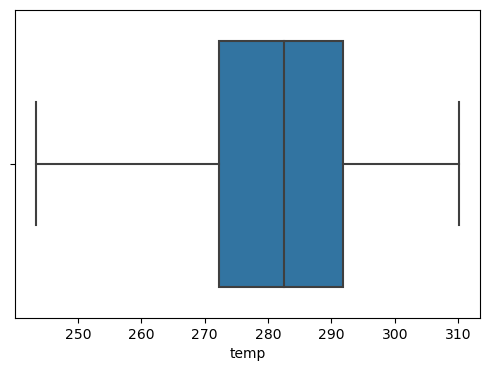

In [ ]:
#SSS
#uklanjanje outliera
df = df.loc[df.temp>200]
#df['temp'] = (df['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df)
plt.show()

## Checking traffic volume by holidays

In [ ]:

#razlika u guzvi kada je praznik i kada nije
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='traffic_volume', data = df)
plt.show()

## Dropping unnecessary columns

In [ ]:
#SSS
#uklanjanje podataka o tome da li je kisa ili sneg jer se vec na osnovu parametra weather zna da li jeste ili nije
df.drop(columns = ['rain_1h','snow_1h', 'weather_description'],inplace = True)#note- moze da se prebaci i snow no snow u true i false, takodje i za kisu, ali nekako deluje kao da to vec znamo na osnovu tekucih vremennskih prilika
df.head()

,holiday,temp,clouds_all,weather_main,date_time,traffic_volume,weekday,date,hour,month,year
0,False,288.28,40,Clouds,2012-10-02 09:00:00,5545,WeekDay,2012-10-02,9,10,2012
1,False,289.36,75,Clouds,2012-10-02 10:00:00,4516,WeekDay,2012-10-02,10,10,2012
2,False,289.58,90,Clouds,2012-10-02 11:00:00,4767,WeekDay,2012-10-02,11,10,2012
3,False,290.13,90,Clouds,2012-10-02 12:00:00,5026,WeekDay,2012-10-02,12,10,2012
4,False,291.14,75,Clouds,2012-10-02 13:00:00,4918,WeekDay,2012-10-02,13,10,2012


In [ ]:
#uklanjanje podataka o tome da li je kisa ili sneg jer se vec na osnovu parametra weather zna da li jeste ili nije
df.drop(columns = ['weather_description'],inplace = True)#note- moze da se prebaci i snow no snow u true i false, takodje i za kisu, ali nekako deluje kao da to vec znamo na osnovu tekucih vremennskih prilika
df.head()

## Counting weather condition rows

In [ ]:
df['weather_main'].value_counts()


## Merging similar weather conditions

In [ ]:
#SSS
#vremenske prilike koje su slicne stavljene u isti tip
df.loc[df['weather_main'].str.contains('Haze'),'weather_main'] = 'Fog'   
df.loc[df['weather_main'].str.contains('Mist'),'weather_main'] = 'Fog'   
df.loc[df['weather_main'].str.contains('Smoke'),'weather_main'] = 'Fog'   
df.loc[df['weather_main'].str.contains('Squall'),'weather_main'] = 'Thunderstorm'       
df['weather_main'].value_counts()

Clouds          15164
Clear           13381
Fog              8242
Rain             5672
Snow             2876
Drizzle          1821
Thunderstorm     1038
Name: weather_main, dtype: int64

In [ ]:
#pretvaranje praznika u true ili false, dan ili jeste praznik ili nije
def modify_weather(x):
    if x == 'Clouds':
        return 0
    elif x== 'Clear':
        return 1
    elif x== 'Fog':
        return 2
    elif x== 'Rain':
        return 3
    elif x== 'Snow':
        return 4
    elif x== 'Drizzle':
        return 5
    else:
        return 6
df['weather_main'] = df['weather_main'].map(modify_weather)
df.head()

In [ ]:
#pretvaranje praznika u true ili false, dan ili jeste praznik ili nije
def modify_weekday(x):
    if x == 'WeekDay':
        return 0
    else:
        return 1
df['weekday'] = df['weekday'].map(modify_weekday)
df.head()

### One-Hot encoding test example 1

In [ ]:
# #one hot endocing hour
# # Use as many lines of code as you need!
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['hour']]))

# # One-hot encoding removed index; put it back
# OH_cols.index = df.index
# column_name = OH_encoder.get_feature_names_out(['hour'])
# OH_cols.columns = column_name

# # Remove categorical columns (will replace with one-hot encoding)
# num_X = df.drop("hour", axis=1)
# OH_X = pd.concat([num_X, OH_cols], axis=1)
# #one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

# df=OH_X
# OH_cols = pd.DataFrame(df[['traffic_volume']])
# num_X = df.drop("traffic_volume", axis=1)
# Odf_X = pd.concat([num_X, OH_cols], axis=1)
# df=Odf_X
# df.head()

### One-Hot encoding test example 2

In [ ]:
# #one hot endocing mesec
# # Use as many lines of code as you need!
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['month']]))

# # One-hot encoding removed index; put it back
# OH_cols.index = df.index
# column_name = OH_encoder.get_feature_names_out(['month'])
# OH_cols.columns = column_name

# # Remove categorical columns (will replace with one-hot encoding)
# num_X = df.drop("month", axis=1)
# OH_X = pd.concat([num_X, OH_cols], axis=1)
# #one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

# df=OH_X
# OH_cols = pd.DataFrame(df[['traffic_volume']])
# num_X = df.drop("traffic_volume", axis=1)
# Odf_X = pd.concat([num_X, OH_cols], axis=1)
# df=Odf_X
# df.head()

### Ordinal encoding test example 

In [ ]:
# ordinal_encoder = OrdinalEncoder()
# df[['weekday', 'holiday']] = ordinal_encoder.fit_transform(df[['weekday', 'holiday']])
# df.head()


# Encoding using One-Hot Encoder

In [ ]:
#one hot endocing za weather main
# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['weather_main', 'hour', 'month', 'holiday', 'weekday']]))

# One-hot encoding removed index; put it back
OH_cols.index = df.index
column_name = OH_encoder.get_feature_names_out(['weather_main', 'hour', 'month', 'holiday', 'weekday'])
OH_cols.columns = column_name

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(['weather_main', 'hour', 'month', 'holiday', 'weekday'], axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
#one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

df=OH_X
OH_cols = pd.DataFrame(df[['traffic_volume']])
num_X = df.drop("traffic_volume", axis=1)
Odf_X = pd.concat([num_X, OH_cols], axis=1)
df=Odf_X
df.head()


In [ ]:
#SSS
#one hot endocing za weather main
# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['weather_main','holiday']]))

# One-hot encoding removed index; put it back
OH_cols.index = df.index
column_name = OH_encoder.get_feature_names_out(['weather_main','holiday'])
OH_cols.columns = column_name

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(['weather_main', 'holiday'], axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
#one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

df=OH_X
OH_cols = pd.DataFrame(df[['traffic_volume']])
num_X = df.drop("traffic_volume", axis=1)
Odf_X = pd.concat([num_X, OH_cols], axis=1)
df=Odf_X
df.head()

,temp,clouds_all,date_time,weekday,date,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,traffic_volume
0,288.28,40,2012-10-02 09:00:00,WeekDay,2012-10-02,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5545
1,289.36,75,2012-10-02 10:00:00,WeekDay,2012-10-02,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4516
2,289.58,90,2012-10-02 11:00:00,WeekDay,2012-10-02,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4767
3,290.13,90,2012-10-02 12:00:00,WeekDay,2012-10-02,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5026
4,291.14,75,2012-10-02 13:00:00,WeekDay,2012-10-02,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4918


In [ ]:
#SSS
#one hot endocing za weather main
# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[['weekday']]))

# One-hot encoding removed index; put it back
OH_cols.index = df.index
column_name = OH_encoder.get_feature_names_out(['weekday'])
OH_cols.columns = column_name

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(['weekday'], axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
#one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

df=OH_X
OH_cols = pd.DataFrame(df[['traffic_volume']])
num_X = df.drop("traffic_volume", axis=1)
Odf_X = pd.concat([num_X, OH_cols], axis=1)
df=Odf_X
df.head()

,temp,clouds_all,date_time,date,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,2012-10-02 09:00:00,2012-10-02,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,2012-10-02 10:00:00,2012-10-02,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,2012-10-02 11:00:00,2012-10-02,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,2012-10-02 12:00:00,2012-10-02,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,2012-10-02 13:00:00,2012-10-02,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


# Removing encoded columns

In [ ]:
#SSS
df.drop(columns = ['date'],inplace = True)
df.head()

,temp,clouds_all,date_time,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,2012-10-02 09:00:00,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,2012-10-02 10:00:00,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,2012-10-02 11:00:00,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,2012-10-02 12:00:00,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,2012-10-02 13:00:00,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


In [ ]:
#SSS
df.drop(columns = ['date_time'],inplace = True)
df.head()

,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


Logistic Regression,
Support vector machine,
Decision tree,
Random forest,
Neural networks algorithms - ne postoji, ali predstavlja familiju algoritama koji omogucavaju regresiju.

### Splitting data

In [ ]:
# # SPLITTING DATA
# y = df.traffic_volume
# df_withoutTrafficVolume = df.loc[:, df.columns != 'traffic_volume']
# X = df[df_withoutTrafficVolume.columns]
# #print(y[:10])

# #podela podataka na train i test skupove
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# print("TrainX.shape:")
# print(train_X.shape)
# print("val_X.shape:")
# print(val_X.shape)
# print("train_y.shape:")
# print(train_y.shape)
# print("val_y.shape:")
# print(val_y.shape)
# # print(train_y[:10])
# # print(val_y[:10])

# #df.head()


### DummyRegressor


In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

lm = LinearRegression().fit(train_X, train_y)

lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(train_X, train_y)
  
lm_dummy_median = DummyRegressor(strategy = 'median').fit(train_X, train_y)
y_predict = lm.predict(val_X)
y_predict_dummy_mean = lm_dummy_mean.predict(val_X)
y_predict_dummy_median = lm_dummy_median.predict(val_X)


print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(np.sqrt(mean_squared_error(val_y,
                                                                     y_predict_dummy_mean))))
print("Mean squared error (linear model): {:.2f}".format(np.sqrt(
    mean_squared_error(val_y, y_predict))))

print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(val_y,
                                                                           y_predict_dummy_median)))
print("Median absolute error (linear model): {:.2f}".format(
    median_absolute_error(val_y, y_predict)))

print("r2_score (dummy mean): {:.2f}".format(
    r2_score(val_y, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(
    r2_score(val_y, y_predict_dummy_median)))
print("r2_score (linear model): {:.2f}".format(r2_score(val_y, y_predict)))


### Split Data

In [ ]:
df.head()

In [ ]:
#SSS
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
pdf=df.copy()
labels = np.array(pdf['traffic_volume'])
features= pdf.drop('traffic_volume', axis = 1)

#saving names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

pdf.head()

Training Features Shape: (38555, 16)
Training Labels Shape: (38555,)
Testing Features Shape: (9639, 16)
Testing Labels Shape: (9639,)


,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


### random forest regresson

In [ ]:
#SSS
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, random_state=0)#n_estimators: int = 100, *, criterion: str = "squared_error", max_depth: Any | None = None, min_samples_split: int = 2, min_samples_leaf: int = 1, min_weight_fraction_leaf: float = 0, max_features: str = "auto", max_leaf_nodes: Any | None = None, min_impurity_decrease: float = 0, bootstrap: bool = True, oob_score: bool = False, n_jobs: Any | None = None, random_state: Any | None = None, verbose: int = 0, warm_start: bool = False, ccp_alpha: float = 0, max_samples: Any | None = None

# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'people.')
MSERandomFR = np.sqrt(mean_squared_error(test_labels, predictions))

print("MSE using RandomForestRegressor: " + str(MSERandomFR))

# Calculate mean absolute percentage error (MAPE)
mape = 100*(errors / test_labels)

print(mape)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 283.57 people.
MSE using RandomForestRegressor: 482.897451986568
[ 2.18368846 52.15699659  6.49978012 ...  5.27225673 17.76984564
  1.23705093]
Accuracy: 22.26 %.


### predictions vs real data

In [ ]:
x_ax = range(len(test_labels))
plt.plot(x_ax, test_labels, label="original")
plt.plot(x_ax, predictions, label="predicted")
plt.title("RandomForestRegressor")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

x_ay = range(len(train_labels))

plt.scatter(x_ay, train_labels,color='g') 
plt.plot(test_features, predictions,color='k') 
plt.show()

In [ ]:
pdf.head()

### variable importance

In [ ]:
pdf.head()


,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


## Univariate Feature selection 

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

y = pdf.traffic_volume
df_withoutTrafficVolume = pdf.loc[:, pdf.columns != 'traffic_volume']
X = pdf[df_withoutTrafficVolume.columns]

bestfeatures = SelectKBest(score_func=mutual_info_regression, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(X.columns.size,'Score'))  #print 10 best features


                        Specs     Score
2                        hour  1.360927
0                        temp  0.400063
3                       month  0.180242
15            weekday_Weekend  0.125019
14            weekday_WeekDay  0.124923
4                        year  0.115382
1                  clouds_all  0.105744
6         weather_main_Clouds  0.021199
8            weather_main_Fog  0.012043
5          weather_main_Clear  0.011334
12              holiday_False  0.002297
13               holiday_True  0.001908
10          weather_main_Snow  0.000835
7        weather_main_Drizzle  0.000000
9           weather_main_Rain  0.000000
11  weather_main_Thunderstorm  0.000000


### Linear Regression Feature Importance

Feature: holiday_True, Score: -762.70943
Feature: weekday_Weekend, Score: -476.45085
Feature: weather_main_Thunderstorm, Score: -358.12832
Feature: weather_main_Rain, Score: -20.94477
Feature: month, Score: -13.46513
Feature: weather_main_Drizzle, Score: -5.52231
Feature: year, Score: -0.30412
Feature: clouds_all, Score: 2.20717
Feature: weather_main_Snow, Score: 8.64471
Feature: temp, Score: 17.02233
Feature: weather_main_Fog, Score: 19.08867
Feature: weather_main_Clear, Score: 37.04474
Feature: hour, Score: 93.90209
Feature: weather_main_Clouds, Score: 319.81728
Feature: weekday_WeekDay, Score: 476.45085
Feature: holiday_False, Score: 762.70943


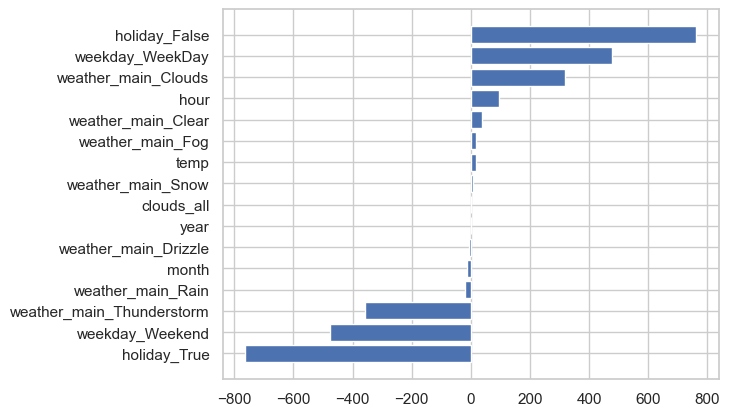

In [ ]:
from matplotlib import pyplot

model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = sorted(zip(model.coef_, X.columns), key = lambda x: x[0])
# summarize feature importance
for coef, feat in importance:
	print('Feature: %s, Score: %.5f' % (feat, coef))
# plot feature importance
pyplot.barh([x[1] for x in importance], [x[0] for x in importance])
pyplot.show()


### CART Decision Tree Feature Importance

Feature: holiday_True, Score: 0.00000
Feature: holiday_False, Score: 0.00002
Feature: weather_main_Thunderstorm, Score: 0.00011
Feature: weather_main_Drizzle, Score: 0.00012
Feature: weather_main_Rain, Score: 0.00047
Feature: weather_main_Snow, Score: 0.00053
Feature: weather_main_Fog, Score: 0.00101
Feature: weather_main_Clear, Score: 0.00103
Feature: weather_main_Clouds, Score: 0.00205
Feature: clouds_all, Score: 0.00675
Feature: year, Score: 0.01018
Feature: weekday_WeekDay, Score: 0.01043
Feature: month, Score: 0.01121
Feature: temp, Score: 0.04364
Feature: weekday_Weekend, Score: 0.08514
Feature: hour, Score: 0.82731


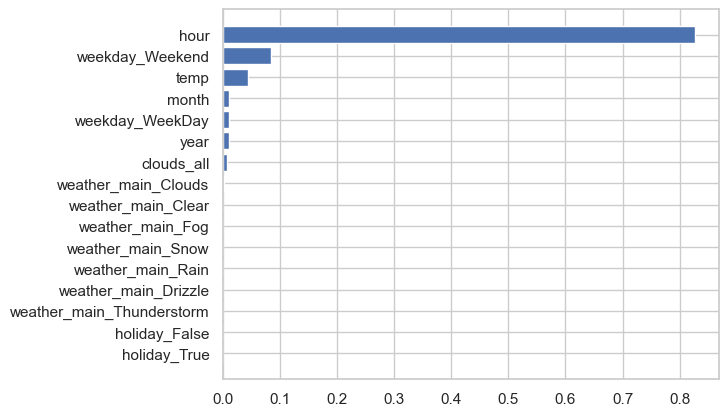

In [ ]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = sorted(zip(model.feature_importances_, X.columns), key = lambda x: x[0])

# summarize feature importance
for coef, feat in importance:
 print('Feature: %s, Score: %.5f' % (feat, coef))
# plot feature importance
pyplot.barh([x[1] for x in importance], [x[0] for x in importance])
pyplot.show()


### Random Forest Regression Feature Importance

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: hour                 Importance: 0.83
Variable: weekday_Weekend      Importance: 0.06
Variable: temp                 Importance: 0.04
Variable: weekday_WeekDay      Importance: 0.04
Variable: clouds_all           Importance: 0.01
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.01
Variable: weather_main_Clear   Importance: 0.0
Variable: weather_main_Clouds  Importance: 0.0
Variable: weather_main_Drizzle Importance: 0.0
Variable: weather_main_Fog     Importance: 0.0
Variable: weather_main_Rain    Importance: 0.0
Variable: weather_main_Snow    Importance: 0.0
Variable: weather_main_Thunderstorm Importance: 0.0
Variable: holiday_False        Importance: 0.0
Variable: holiday_True         Importance: 0.0


 ### Method for testing various models

In [ ]:
#SSS
from sklearn.metrics import r2_score
def train_test_various_models(models, X_train, X_test, y_train, y_test):
    """trains and test given models on given data"""
    data_table=pd.DataFrame(columns=['model','r2_score training', 'r2_score test', 'MSE training', 'MSE test'])
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        num_rows = data_table.shape[0]
        data_table.loc[num_rows+1] = [model_name, r2_score(y_train, y_train_pred),
         r2_score(y_test, y_test_pred),
          np.sqrt(mean_squared_error(y_train, y_train_pred)),
           np.sqrt(mean_squared_error(y_test, y_test_pred))]

    return data_table



### Train and test various models

In [ ]:
#SSS
from sklearn.linear_model import Perceptron
models = {
    'linear_regression': LinearRegression(),
    'random_forest_regressor': RandomForestRegressor(max_depth=5, n_estimators=10),
    'decision_tree_regresor': DecisionTreeRegressor(max_depth=5)
}

data_table1=train_test_various_models(models, train_features, test_features, train_labels, test_labels)
data_table1.head()

,model,r2_score training,r2_score test,MSE training,MSE test
1,linear_regression,0.190959,0.187017,1786.001678,1795.377070
2,random_forest_regressor,0.904553,0.902988,613.446927,620.193375
3,decision_tree_regresor,0.904498,0.902952,613.625243,620.308855


### The best model's hyperparameters tuning

### Model Evaluation and Selection

### Decision tree regressor hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV


tree_reg = DecisionTreeRegressor()
param_grid = [
    {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300]}
]
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_features, train_labels)
grid_search.best_params_

In [ ]:
forest_reg = RandomForestRegressor()
param_grid = [
    {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300],
     'n_estimators': [10, 20 ,50, 75, 100]}
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_features, train_labels)
grid_search.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor()
param_grid = [
    {'max_depth': [17, 20], 'min_samples_leaf': [10],
     'n_estimators': [100, 200, 300]}
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_features, train_labels)
grid_search.best_params_

In [ ]:
#SSS
models = {
    'best_linear_regression': LinearRegression(),
    'best random_forest_regressor': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best decision_tree_regresor': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table2=train_test_various_models(models, train_features, test_features, train_labels, test_labels)
data_table2.head(10)

,model,r2_score training,r2_score test,MSE training,MSE test
1,best_linear_regression,0.190959,0.187017,1786.001678,1795.377070
2,best random_forest_regressor,0.952579,0.939437,432.396623,490.027376
3,best decision_tree_regresor,0.936839,0.931342,499.025295,521.746118


### Plot learning curves - sporo izracunavanje

In [ ]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("iteration")
    plt.ylabel("error")


plot_learning_curves(DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
                     train_features, train_labels)
plot_learning_curves(RandomForestRegressor(max_depth=17, n_estimators=50, 
                                                         min_samples_leaf=10),
                     train_features, train_labels)

### Visualize Decision Tree Regressor predictions

In [ ]:
###SSS
traffic_volume_train_pred = models['best decision_tree_regresor'].predict(train_features)
traffic_volume_test_pred = models['best decision_tree_regresor'].predict(test_features)
df_train_pred =  pd.DataFrame(train_labels, columns={"traffic_volume"})

df_train_pred['traffic_volume_pred'] = traffic_volume_train_pred
df_test_pred =pd.DataFrame(test_labels, columns={"traffic_volume"})
df_test_pred['traffic_volume_pred'] = traffic_volume_test_pred
df_test_pred.head()



,traffic_volume,traffic_volume_pred
0,4083,4262.100000
1,1172,1685.913043
2,4548,4876.305556
3,3173,2640.288462
4,5575,5357.696429


### Visualize Random forest Regressor predictions

In [ ]:
#SSS
traffic_volume_train_predrf = models['best random_forest_regressor'].predict(train_features)
traffic_volume_test_predrf = models['best random_forest_regressor'].predict(test_features)
df_train_predrf =  pd.DataFrame(train_labels, columns={"traffic_volume"})

df_train_predrf['traffic_volume_pred'] = traffic_volume_train_predrf
df_test_predrf =pd.DataFrame(test_labels, columns={"traffic_volume"})
df_test_predrf['traffic_volume_pred'] = traffic_volume_test_predrf
df_test_predrf.head()

,traffic_volume,traffic_volume_pred
0,4083,4280.683169
1,1172,1575.856692
2,4548,4710.830616
3,3173,2485.971676
4,5575,5449.975527


### Plot predictions vs actual values

In [ ]:
#SSS
def plot_prediction(df, number_of_samples):
    sample = df.sample(n=number_of_samples)
    sample['difference'] = np.abs(df.traffic_volume - df.traffic_volume_pred)
    x= [i+1 for i in range(number_of_samples)]
    plt.scatter(x, sample.traffic_volume, color='blue', marker='*', label='traffic_volume')
    plt.scatter(x, sample.traffic_volume_pred, color='red', marker='o',
               label='_pred')
    for x_i, y_i, diff in zip(x, sample.traffic_volume_pred, sample.difference):
        plt.text(x_i+0.05, y_i, int(diff), color="green", fontsize=12)
    plt.scatter([], [], color='green', marker='$123$', label='difference')
    plt.legend()
    plt.xticks(x)
    plt.grid()
    plt.xlabel('sample number')
    plt.ylabel('traffic')
    plt.title("Comparison of actual and predicted values")
    plt.savefig('traffic_volume_vs_traffic_volume_pred.png')
    
    
plot_prediction(df_test_pred, 25)


### Plotting predictions vs true values from RandomForestRegressor

In [ ]:
#SSS
plot_prediction(df_test_predrf, 25)

## Feature Selection 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

df_withoutTrafficVolume = df.loc[:, pdf.columns != 'traffic_volume']
X = df[df_withoutTrafficVolume.columns]

# Separating the data into training and tests set
X_train, X_test, y_train, y_test = train_test_split(
    X[:10000],
    df['traffic_volume'][:10000],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape




((7000, 16), (3000, 16), (7000,), (3000,))

### Feature selection using Variance Threshold

In [64]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.2) #Removing both constant and quasi-constant
var_thr.fit(X_train)

var_thr.get_support()

concol = [column for column in X_train.columns 
          if column not in X_train.columns[var_thr.get_support()]]
goodCol = [column for column in X_train.columns 
          if column in X_train.columns[var_thr.get_support()]]

print("Bad features:")
for features in concol:
    print(features)


print()
print("Good features:")
for features in goodCol:
    print(features)



Bad features:
year
weather_main_Clear
weather_main_Drizzle
weather_main_Fog
weather_main_Rain
weather_main_Snow
weather_main_Thunderstorm
holiday_False
holiday_True

Good features:
temp
clouds_all
hour
month
weather_main_Clouds
weekday_WeekDay
weekday_Weekend


In [ ]:
Variance_train_X = X_train.drop(concol, axis=1)
Variance_test_X = X_test.drop(concol, axis=1)

In [66]:
Variance_train_X.columns, Variance_test_X.columns

(Index(['temp', 'clouds_all', 'hour', 'month', 'weather_main_Clouds',
        'weekday_WeekDay', 'weekday_Weekend'],
       dtype='object'),
 Index(['temp', 'clouds_all', 'hour', 'month', 'weather_main_Clouds',
        'weekday_WeekDay', 'weekday_Weekend'],
       dtype='object'))

In [67]:
models = {
    'best_logistic_regression': LogisticRegression(),
    'best random_forest_regressor': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best decision_tree_regresor': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table2 = train_test_various_models(
    models, Variance_train_X, Variance_test_X, y_train, y_test)
data_table2.head(10)


c:\Users\Legion\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,r2_score training,r2_score test,MSE training,MSE test
1,best_logistic_regression,0.370361,0.333812,1616.712736,1652.147893
2,best random_forest_regressor,0.950880,0.940998,451.560797,491.683090
3,best decision_tree_regresor,0.935161,0.936189,518.807968,511.327803


In [79]:
traffic_volume_train_pred = models['best decision_tree_regresor'].predict(
    Variance_train_X)
traffic_volume_test_pred = models['best decision_tree_regresor'].predict(
    Variance_test_X)
df_train_pred = pd.DataFrame(y_train, columns={"traffic_volume"})

df_train_pred['traffic_volume_pred'] = traffic_volume_train_pred
df_test_pred = pd.DataFrame(y_test, columns={"traffic_volume"})
df_test_pred['traffic_volume_pred'] = traffic_volume_test_pred
df_test_pred.head()


c:\Users\Legion\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Legion\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,traffic_volume,traffic_volume_pred
9394,856,629.100000
898,2446,2525.466667
2398,4699,4402.246575
5906,680,774.423077
2343,2440,3011.426471


### Feature Selection Using Regularisation

In [68]:
# Scaling the data, as linear models benefits from feature scaling
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

# Selecting features using Lasso regularisation using SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)




SelectFromModel(estimator=LogisticRegression(C=1, solver='liblinear'))

In [84]:
print(sel_.get_support())

selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

print(selected_feat, X_train_selected.shape, X_test_selected.shape)

X_train.head()


[ True  True  True  True  True  True  True False False False False False
 False False False False]
total features: 16
selected features: 7
features with coefficients shrank to zero: 0
Index(['temp', 'clouds_all', 'hour', 'month', 'year', 'weather_main_Clear',
       'weather_main_Clouds'],
      dtype='object') (7000, 7) (3000, 7)


c:\Users\Legion\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Legion\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend
7681,297.29,0,15,7,2013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9031,294.64,1,0,9,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3691,262.45,20,18,2,2013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
202,272.65,1,7,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5625,293.00,20,13,4,2013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [70]:
models = {
    'best_logistic_regression': LogisticRegression(),
    'best random_forest_regressor': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best decision_tree_regresor': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table2=train_test_various_models(models, X_train_selected, X_test_selected, y_train, y_test)
data_table2.head(10)

c:\Users\Legion\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,r2_score training,r2_score test,MSE training,MSE test
1,best_logistic_regression,-0.237413,-0.266610,2266.440223,2278.095227
2,best random_forest_regressor,0.852527,0.802924,782.424772,898.601820
3,best decision_tree_regresor,0.797017,0.777807,917.945726,954.147046


In [80]:
traffic_volume_train_pred = models['best decision_tree_regresor'].predict(
    X_train_selected)
traffic_volume_test_pred = models['best decision_tree_regresor'].predict(
    X_test_selected)
df_train_pred = pd.DataFrame(y_train, columns={"traffic_volume"})

df_train_pred['traffic_volume_pred'] = traffic_volume_train_pred
df_test_pred = pd.DataFrame(y_test, columns={"traffic_volume"})
df_test_pred['traffic_volume_pred'] = traffic_volume_test_pred
df_test_pred.head()


,traffic_volume,traffic_volume_pred
9394,856,629.100000
898,2446,2525.466667
2398,4699,4402.246575
5906,680,774.423077
2343,2440,3011.426471


In [81]:
traffic_volume_train_predrf = models['best random_forest_regressor'].predict(
    X_train_selected)
traffic_volume_test_predrf = models['best random_forest_regressor'].predict(
    X_test_selected)
df_train_predrf = pd.DataFrame(y_train, columns={"traffic_volume"})

df_train_predrf['traffic_volume_pred'] = traffic_volume_train_predrf
df_test_predrf =pd.DataFrame(y_test, columns={"traffic_volume"})
df_test_predrf['traffic_volume_pred'] = traffic_volume_test_predrf
df_test_predrf.head()

,traffic_volume,traffic_volume_pred
9394,856,659.067147
898,2446,2797.222447
2398,4699,4319.299638
5906,680,852.335240
2343,2440,3628.789571


### RFE Recursive Feature Elimination

In [240]:
pdf.head()

,temp,clouds_all,hour,month,year,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm,holiday_False,holiday_True,weekday_WeekDay,weekday_Weekend,traffic_volume
0,288.28,40,9,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5545
1,289.36,75,10,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4516
2,289.58,90,11,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4767
3,290.13,90,12,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5026
4,291.14,75,13,10,2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4918


In [268]:
#SSS
from sklearn.feature_selection import RFE
def featuresRankingRFE(models, train_features, train_labels):
    column_headers = list(pdf.columns.values)
    column_headers.remove("traffic_volume")
    featuresImportance =  pd.DataFrame(column_headers)
    for model_name, model in models.items():
        rfe = RFE(estimator=model, n_features_to_select=5, step=1)
        rfe.fit(train_features, train_labels)
        featuresImportance[model_name] = rfe.ranking_
    print(featuresImportance)
    
featuresRankingRFE(models, train_features, train_labels)

                            0  best_linear_regression  \
0                        temp                       7   
1                  clouds_all                      11   
2                        hour                       5   
3                       month                       8   
4                        year                      12   
5          weather_main_Clear                       4   
6         weather_main_Clouds                       1   
7        weather_main_Drizzle                       9   
8            weather_main_Fog                       6   
9           weather_main_Rain                      10   
10          weather_main_Snow                       3   
11  weather_main_Thunderstorm                       2   
12              holiday_False                       1   
13               holiday_True                       1   
14            weekday_WeekDay                       1   
15            weekday_Weekend                       1   

    best random_forest_regress

### DON'T TOUCH RFE with real data

In [ ]:
from sklearn.feature_selection import RFE
def featuresRankingRFE(models, train_features, train_labels):
    column_headers = list(pdf.columns.values)
    column_headers.remove("traffic_volume")
    featuresImportance =  pd.DataFrame(column_headers)
    for model_name, model in models.items():
        rfe = RFE(estimator=model, n_features_to_select=5, step=1)
        rfe.fit(train_features, train_labels)
        featuresImportance[model_name] = rfe.ranking_
    print(featuresImportance)
    
featuresRankingRFE(models, train_features, train_labels)


In [ ]:
#SSS
from sklearn.model_selection import train_test_split
def dropAndSplitFeatures(featuresToDrop, data):
    features= pdf.drop(columns=featuresToDrop, axis = 1)
    feature_list = list(features.columns)
    

    # Convert to numpy array
    features = np.array(features)
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)
    return train_features, test_features, train_labels, test_labels, feature_list

In [ ]:
df.head()


In [ ]:
#SSS
cols = [c for c in df.columns if c.lower()[:12] != 'weather_main']

pdf=df[cols]
cols = [c for c in pdf.columns if c.lower()[:7] != 'holiday']

pdf=pdf[cols]
pdf.head()

In [ ]:
#SSS
pdf=pdf.copy()
train_features, test_features, train_labels, test_labels, feature_list = dropAndSplitFeatures(['traffic_volume'], pdf)
#train_test_various_models(models, train_features, test_features, train_labels, test_labels)

models = {
    'best_linear_regression_less_features': LinearRegression(),
    'best random_forest_regressor_less_features': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best decision_tree_regresor_less_features': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table3=train_test_various_models(models, train_features, test_features, train_labels, test_labels)
data_table3.head()

In [ ]:
#SSS
data_table=pd.concat([data_table1,data_table2])
data_table=pd.concat([data_table,data_table3])
data_table.head(9)

### o=pokusaj nad osnovnim podacima

In [ ]:
pdf=df.copy()
train_features, test_features, train_labels, test_labels, feature_list = dropAndSplitFeatures(['traffic_volume', 'snow_1h', 'rain_1h', 'holiday', 'clouds_all' ], pdf)
#train_test_various_models(models, train_features, test_features, train_labels, test_labels)

models = {
    'best_linear_regression_less_features': LinearRegression(),
    'best random_forest_regressor_less_features': RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
    'best decision_tree_regresor_less_features': DecisionTreeRegressor(max_depth=15, min_samples_leaf=50),
}
#data_table=pd.concat([data_table,(train_test_various_models(models, train_features, test_features, train_labels, test_labels))])
data_table3=train_test_various_models(models, train_features, test_features, train_labels, test_labels)
data_table3.head()


In [ ]:
print(feature_list)

In [ ]:
pdf.info()

## Trying to implement bio-inspired algorithm for feature selection


In [ ]:
# install the DEAP library
%pip install deap

# import necessary libraries
import pandas as pd
import numpy as np
from deap import creator, base, tools, algorithms

In [ ]:
df = data.copy()
df.head()

### pokusaj

In [ ]:


# load the dataset
df = pdf.copy()

# split the data into features and target
y = df["traffic_volume"]
X = df.drop(columns=["traffic_volume"])


model = LinearRegression()
# define the genetic algorithm for feature selection

# define the genetic algorithm for feature selection
def genetic_algorithm(X, y):
    # create the fitness function
    def evaluate(individual):
        # get the selected features
        selected_features = [i for i, x in enumerate(individual) if x == 1]
        X_selected = X.iloc[:, selected_features]
        
        # fit a linear regression model and return the mean cross-validated score
 
        scores = cross_val_score(model, X_selected, y, cv=5)
        return np.mean(scores),
    
    # create the genetic algorithm
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(X.columns))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    # run the genetic algorithm
    population = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("mean", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    population, log = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)
    
    # return the selected features
    selected_features = [i for i, x in enumerate(hof[0]) if x == 1]
    return selected_features

# run the genetic algorithm
selected_features = genetic_algorithm(X, y)
#print(selected_features)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

regressors = ['LinearSVM', 'RandomForest',  'DecisionTree']

models = [svm.SVC(kernel='linear'),
         RandomForestRegressor(max_depth=17, n_estimators=100, min_samples_leaf=10),
           DecisionTreeRegressor(max_depth=15, min_samples_leaf=50)]


def acc_score(df,label):
    Score = pd.DataFrame({"Regressor": regressors})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
data_bc =pdf.copy()
label_bc = data_bc["traffic_volume"]
#label_bc = np.where(label_bc == 'M',1,0)
#data_bc.drop(["id","diagnosis","Unnamed: 32"],axis = 1,inplace = True)

print("Breast Cancer dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

In [ ]:
score1 = acc_score(data_bc,label_bc)
score1

In [ ]:
import random
import math
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn import svm
import numpy as np


class FireflyAlgorithm():

    def __init__(self, function):
        self.D = 121  # dimension of the problem (Gene number)
        self.NP = 100  # population size (Firefly number)
        self.nFES = 1  # number of function evaluations (repeate number)
        self.alpha = 1  # alpha parameter,(randomization parameter)
        self.betamin = 0.5  # beta parameter
        self.gamma = 1  # gamma parameter (light intensity coefficency)
        # sort of fireflies according to fitness value
        self.Index = [0] * self.NP
        self.Fireflies = [[np.random.rand() for i in range(self.D)] for j in range(self.NP)]  # firefly agents,
        self.Fireflies_tmp = [[np.random.rand() for i in range(self.D)] for j in range(
            self.NP)]  # intermediate pop
        self.Fitness = [0.0] * self.NP  # fitness values (Accuracy)
        self.I = [0.0] * self.NP  # light intensity
        self.nbest = [0.0] * self.NP  # the best solution found so far
        self.LB = 0  # lower bound
        self.UB = 1  # upper bound
        self.fbest = None  # the best
        self.evaluations = 0
        self.Fun = function

    def alpha_new(self, a):
        delta = 1.0 - math.pow((math.pow(10.0, -4.0) / 0.9), 1.0 / float(a))
        return (1 - delta) * self.alpha

    def sort_ffa(self):  # implementation of bubble sort

        for i in range(self.NP):
            self.Index[i] = i

        for i in range(0, (self.NP - 1)):
            j = i + 1
            for j in range(j, self.NP):
                if (self.I[i] > self.I[j]):
                    z = self.I[i]  # exchange attractiveness
                    self.I[i] = self.I[j]
                    self.I[j] = z
                    z = self.Fitness[i]  # exchange fitness
                    self.Fitness[i] = self.Fitness[j]
                    self.Fitness[j] = z
                    z = self.Index[i]  # exchange indexes
                    self.Index[i] = self.Index[j]
                    self.Index[j] = z


    def replace_ffa(self):  # replace the old population according to the new Index values
        # copy original population to a temporary area
        for i in range(self.NP):
            for j in range(self.D):
                self.Fireflies_tmp[i][j] = self.Fireflies[i][j]

        # generational selection in the sense of an EA
        for i in range(self.NP):
            for j in range(self.D):
                self.Fireflies[i][j] = self.Fireflies_tmp[self.Index[i]][j]

    def FindLimits(self, k):
        for i in range(self.D):
            if self.Fireflies[k][i] < self.LB:
                self.Fireflies[k][i] = self.LB
            if self.Fireflies[k][i] > self.UB:
                self.Fireflies[k][i] = self.UB

    def move_ffa(self):
        for i in range(self.NP):
            scale = abs(self.UB - self.LB)
            for j in range(self.NP):
                r = 0.0
                for k in range(self.D):
                    r += (self.Fireflies[i][k] - self.Fireflies[j][k]) * \
                        (self.Fireflies[i][k] - self.Fireflies[j][k])
                r = math.sqrt(r)
                if self.I[i] > self.I[j]:  # brighter and more attractive
                    beta0 = 1.0
                    beta = (beta0 - self.betamin) * math.exp(-self.gamma * math.pow(r, 2.0)) + self.betamin
                    for k in range(self.D):
                        r = random.uniform(0, 1)
                        tmpf = self.alpha * (r - 0.5) * scale
                        self.Fireflies[i][k] = self.Fireflies[i][
                            k] * (1.0 - beta) + self.Fireflies_tmp[j][k] * beta + tmpf
            self.FindLimits(i)

    def Run(self):
        while self.evaluations < self.nFES:

            # optional reducing of alpha
            #self.alpha = self.alpha_new(self.nFES/self.NP)
            self.evaluations = self.evaluations + 1
            # evaluate new solutions
            for i in range(self.NP):
                self.Fitness[i] = self.Fun(self.Fireflies[i])

                self.I[i] = self.Fitness[i]


            # ranking fireflies by their light intensit
            self.sort_ffa()
            # replace old population
            self.replace_ffa()
            # move all fireflies to the better locations
            self.move_ffa()

        bestFirefly = self.Fireflies[self.NP - 1]

        return bestFirefly

#File which applied
file_ = "File Name: "

df = pdf.copy()

y = df['traffic_volume'].values
X = df.drop('traffic_volume', axis=1).values


def evaluation(feature_possibilities):
        feature_possibilities = np.round(feature_possibilities)

        feature_possibilities = feature_possibilities > np.float32(0.5)

        selectedX = X[:, feature_possibilities]

        s = svm.SVC(kernel="poly", C=1)

        loocv = LeaveOneOut()
        evaluation = cross_val_score(s, selectedX, y,  cv=loocv)

        return evaluation.mean()

Algorithm = FireflyAlgorithm(evaluation)
Best = Algorithm.Run()


a = np.round(Best)

feature_take_or_not = a > np.float32(0.7)

print(feature_take_or_not)

print(Best)

true_number = np.array(np.unique(feature_take_or_not, return_counts=True)).T


bestX = X[:, gene_take_or_not]

print(true_number)

s = svm.SVC(kernel="linear")
loocv = LeaveOneOut()
evaluation = cross_val_score(s, bestX, y,  cv=loocv)
print("Final Accuracy: %.6f%% (%.6f%%)" % (evaluation.mean(), evaluation.std()))

total = ((df.drop("Label", axis=1).columns.values, gene_take_or_not, Best))

df2 = pd.DataFrame(total, ["Features", "Selection", "Importance"])
df2.to_excel(f"FF-SVM-Feature-Selection-{file_}", index=False)

In [ ]:
from sklearn.metrics import accuracy_score
forest_model = RandomForestRegressor(n_estimators = 100, random_state = 1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print("MAE using RandomForestRegressor: " + str(mean_absolute_error(val_y, melb_preds)))

MSERandomFR = np.sqrt(mean_squared_error(val_y, melb_preds))
print("MSE using RandomForestRegressor: " + str(MSERandomFR))


x_ax = range(len(val_y))
plt.plot(x_ax, val_y, label="original")
plt.plot(x_ax, melb_preds, label="predicted")
plt.title("RandomForestRegressor")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


# DecisionTreeRegressor

In [ ]:
dtr_model = DecisionTreeRegressor()
# Fit model
dtr_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = dtr_model.predict(val_X)
print("MAE using DecisionTreeRegressor: " +
      str(mean_absolute_error(val_y, val_predictions)))

MSEDTR = np.sqrt(mean_squared_error(val_y, val_predictions))
print("MSE using DecisionTreeRegressor: " + str(MSEDTR))

x_ax = range(len(val_y))
plt.plot(x_ax, val_y, label="original")
plt.plot(x_ax, val_predictions, label="predicted")
plt.title("DecisionTreeRegressor")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

# Calculate train set accuracy using mean absolute error
print("MAR using LinearRegression: " + str(mean_absolute_error(lin_reg.predict(val_X), val_y)))

# Calculate train set accuracy using root mean square
MSELR = np.sqrt(mean_squared_error(lin_reg.predict(val_X), val_y))
print("MSE using LinearRegression: " + str(MSELR))



x_ax = range(len(val_y))
plt.plot(x_ax, val_y, label="original")
plt.plot(x_ax, lin_reg.predict(val_X), label="predicted")
plt.title("LinearRegression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
print("MAE using RandomForestRegressor: " + str(mean_absolute_error(val_y, melb_preds)))
print("MSE using RandomForestRegressor: " + str(MSERandomFR))
print("MAE using DecisionTreeRegressor: " + str(mean_absolute_error(val_y, val_predictions)))
print("MSE using DecisionTreeRegressor: " + str(MSEDTR))
print("MAR using LinearRegression: " + str(mean_absolute_error(lin_reg.predict(val_X), val_y)))
print("MSE using LinearRegression: " + str(MSELR))

## RandomForestRegressor function with tuning n_estimators parameter

In [ ]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

## Plot with results of multiple n_estimator values

In [ ]:
results = {} # Your code here
for i in range(50,450, 50):
    results[i]= get_score(i)

%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()


### Showing best result

In [ ]:
#BEST RESULT

print("RandomForestRegressor best result:")
print("n_estimators: "+ str(min(results.items(), key=lambda x: x[1])[0]))
print("mean_absolute_error: "+ str(min(results.items(), key=lambda x: x[1])[1]))

## Pipeline of Different Models -> needs improvement

In [ ]:
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                              ])

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print(scores)
print("RandomForestRegressor\nAverage MAE score (across experiments):")
print(scores.mean())

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LogisticRegression(
                                  solver='liblinear', multi_class='ovr'))
                              ])

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("LogisticRegression\nAverage MAE score (across experiments):")
print(scores.mean())

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', KNeighborsRegressor())
                              ])

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("KNeighborsRegressor\nAverage MAE score (across experiments):")
print(scores.mean())


# # Print number of unique entries by column, in ascending order
# # sorted(d.items(), key=lambda x: x[1])
# models = []
# models.append(('LR', LogisticRegression(
#     solver='liblinear', multi_class='ovr')))
# # models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsRegressor()))
# models.append(('DTR', DecisionTreeRegressor()))
# # models.append(('NB', GaussianNB()))
# models.append(('LinearSVR', LinearSVR(random_state=0, tol=1e-5)))
# # # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#  cv_results = cross_val_score(model, X_train, Y_train, scoring='accuracy')
#  results.append(cv_results)
#  names.append(name)
#  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# # # Compare Algorithms
# plt.boxplot(results, labels=names)
# plt.title('Algorithm Comparison')
# plt.show()


SGDRegressor test example -> needs improvement

In [ ]:
sgdr = SGDRegressor(penalty='elasticnet')
sgdr.fit(train_X, train_y)

score = sgdr.score(train_X, train_y)
print("R-squared:", score)

# cv_score = cross_val_score(lsvr, x, y, cv=5)
# print("CV mean score: ", cv_score.mean())

ypred = sgdr.predict(val_X)

mse = mean_squared_error(val_y, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(val_y))
plt.plot(x_ax, val_y, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# sgdr = SGDRegressor()
# print(sgdr)

# sgdr.fit(train_X, train_y)

# score = sgdr.score(train_X, train_y)
# print("R-squared:", score)

# cv_score = cross_val_score(sgdr, X, y, cv = 10)
# print("CV mean score: ", cv_score.mean())

# ypred = sgdr.predict(val_X)

# mae = mean_absolute_error(val_y, ypred)
# mse = mean_squared_error(val_y, ypred)
# print("MAE: ", mae)
# print("MSE: ", mse)
# print("RMSE: ", mse**(1/2.0))

